# PB30 dataset for example.

## import packages

In [1]:
import os
import pandas as pd
import numpy as np
from joblib import load,dump
import seaborn as sns
import matplotlib.pyplot as plt

## PB30 data processing

In [2]:
# load Ramen spectra
X_tr_1d = 'dataset/X_reference.npy'
X_tr_1d = np.load(X_tr_1d)

X_fn_1d = 'dataset/X_finetune.npy'
X_fn_1d = np.load(X_fn_1d)

X_ts_1d = 'dataset/X_test.npy'
X_ts_1d = np.load(X_ts_1d)

In [3]:
# put all in one dataframe
df_all = pd.DataFrame()
df_all = pd.concat([df_all,pd.DataFrame(X_tr_1d)])
df_all = pd.concat([df_all,pd.DataFrame(X_fn_1d)])
df_all = pd.concat([df_all,pd.DataFrame(X_ts_1d)])
df_all.columns = np.load('dataset/wavenumbers.npy')
df_all.to_csv('dataset/pb30_example.csv')

In [4]:
df_all = pd.read_csv('dataset/pb30_example.csv').iloc[:,1:]

In [5]:
# labels for PB30
from utils.pb_config import ORDER, STRAINS
y_tr = 'dataset/y_reference.npy'
y_tr = np.load(y_tr)
y_fn = 'dataset/y_finetune.npy'
y_fn = np.load(y_fn)
y_ts = 'dataset/y_test.npy'
y_ts = np.load(y_ts)
y_all = np.concatenate([y_tr,y_fn,y_ts])
y_all_l = [STRAINS[i] for i in y_all]
df_all['label'] = y_all_l

In [6]:
df_all

,1792.4,1791.2,1789.9,1788.6,1787.3,1786.0,1784.8,1783.5,1782.2,1780.9,...,394.43,392.87,391.32,389.76,388.21,386.65,385.09,383.54,381.98,label
0,0.355230,0.307011,0.343189,0.339982,0.347972,0.386992,0.397851,0.299021,0.326760,0.354527,...,0.208673,0.258561,0.280453,0.246196,0.150188,0.265301,0.256763,0.147074,0.240078,C. albicans
1,0.233456,0.322983,0.243794,0.248002,0.345268,0.300989,0.303278,0.336598,0.305915,0.228704,...,0.167161,0.255974,0.209174,0.238169,0.232389,0.195733,0.147595,0.192694,0.236016,C. albicans
2,0.202753,0.283821,0.303611,0.348365,0.263736,0.328938,0.285183,0.343576,0.320291,0.326487,...,0.315230,0.271815,0.221728,0.223950,0.276241,0.221984,0.097501,0.150160,0.196144,C. albicans
3,0.249359,0.305383,0.345827,0.209503,0.236896,0.313727,0.221610,0.303642,0.325891,0.350765,...,0.225478,0.205102,0.255046,0.258314,0.292907,0.265251,0.151959,0.231126,0.084298,C. albicans
4,0.326106,0.225303,0.279976,0.266308,0.298736,0.297044,0.274851,0.327849,0.338117,0.271519,...,0.249154,0.205331,0.204340,0.252981,0.178746,0.265197,0.180899,0.137719,0.137364,C. albicans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65995,0.197098,0.252480,0.349704,0.146948,0.265009,0.362183,0.229138,0.333261,0.269941,0.157775,...,0.418033,0.391364,0.455361,0.456547,0.339128,0.221695,0.208873,0.307653,0.204116,Group G Strep.
65996,0.241473,0.424548,0.437924,0.415929,0.337288,0.322335,0.349774,0.355988,0.305628,0.361305,...,0.388002,0.396154,0.354786,0.391162,0.427510,0.456759,0.429426,0.387924,0.473664,Group G Strep.
65997,0.385619,0.383573,0.246973,0.308617,0.455137,0.318488,0.316349,0.505374,0.481959,0.394803,...,0.433831,0.614034,0.610132,0.535417,0.581073,0.421384,0.495355,0.271939,0.402549,Group G Strep.
65998,0.374572,0.392654,0.360988,0.315091,0.318828,0.365250,0.397442,0.294629,0.404938,0.550750,...,0.435012,0.495425,0.591339,0.410160,0.115290,0.424320,0.491780,0.367389,0.512980,Group G Strep.


In [7]:
# average spectra
pb_dic = {}
for group in df_all.groupby('label'):
    pb_dic[group[0]] = group[1].mean()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

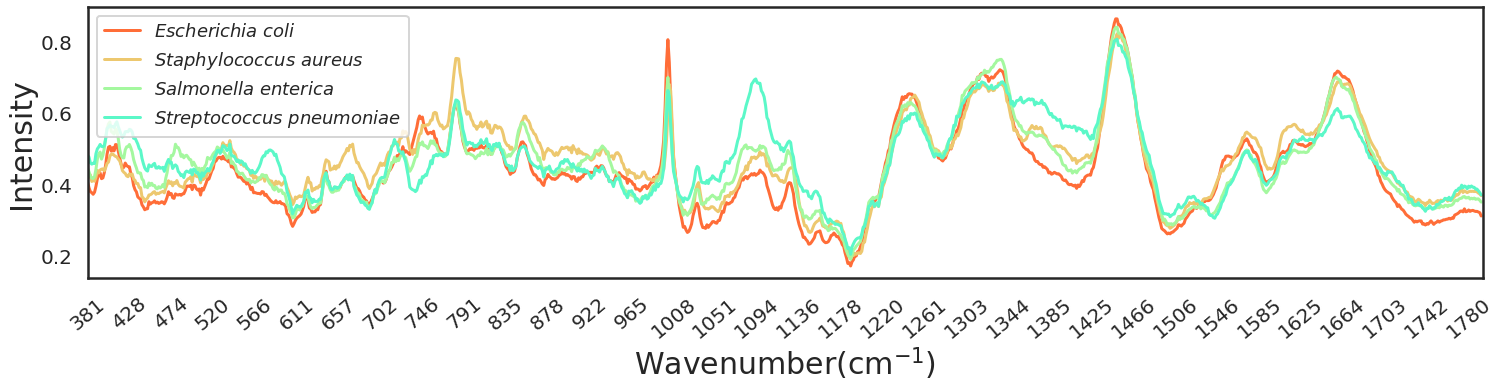

In [8]:
# plot average spectra
xx = pb_dic['C. albicans'].reindex(pb_dic['C. albicans'].index[::-1]).index
x = []
for i in xx:
    x.append(float(i))
x = list(map(int,x))
xticks = range(0,len(x),30)
xlabels = [x[index] for index in xticks]

sns.set_context("poster")
sns.set_style('white')
color = sns.color_palette("rainbow_r", 6)
fig,ax = plt.subplots(1,1,figsize = (25,5))

for idx,name in enumerate(['E. coli 1','MSSA 1','S. enterica','S. pneumoniae 1']):
    ax.plot(pb_dic[name].reindex(pb_dic[name].index[::-1]),c = color[idx])
ax.legend(['${Escherichia}$ ${coli}$','${Staphylococcus}$ ${aureus}$','${Salmonella}$ ${enterica}$',
           '${Streptococcus}$ ${pneumoniae}$'],fontsize=18)
ax.set_xticks(xticks)

ax.set_xticklabels(xlabels,rotation=40)

ax.set_xlim(left=0,right  = len(x))
ax.set_ylabel('Intensity',size = 30)
ax.set_xlabel('Wavenumber(cm$^\mathrm{-1}$)',size = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

## PCA  and pairing

In [9]:
from utils.PCA_tool import PCA_transform

In [10]:
#PCA and pairing
df_pca = PCA_transform (df_all.iloc[:,:-1],44)

In [11]:
df_pca.to_csv('dataset/pb30_pca_example.csv')

In [12]:
df_pca = pd.read_csv('dataset/pb30_pca_example.csv').iloc[:,1:]

In [13]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,1800,1801,1802,1803,1845,1846,1847,1890,1891,1935
0,0.082719,-0.321786,-0.139538,-0.117331,0.207962,0.478480,0.383856,-0.215660,-0.112133,0.159670,...,0.578473,0.264181,-0.205868,1.157927,-0.205039,-0.760767,0.603048,-0.871624,0.132499,1.060002
1,1.069528,0.229647,1.043629,0.756473,0.939853,1.212428,1.663378,0.655005,0.914079,1.324454,...,0.554644,0.172686,0.339159,0.514444,-0.310622,-0.273486,-0.098477,-0.075874,0.067997,0.172164
2,0.438560,-0.083758,0.425800,0.233057,0.368754,0.795349,0.942389,0.062412,0.279032,0.662502,...,-0.429362,-0.458972,-0.437918,-0.250744,-0.219676,-0.289437,-0.102146,-0.189615,-0.080636,0.075716
3,0.538536,0.049462,0.480905,0.406302,0.489600,0.888943,1.022720,0.152566,0.358789,0.726485,...,0.381988,-0.326603,0.730464,0.328439,-0.844146,-0.137509,-0.540070,0.651419,0.518760,0.081926
4,0.698772,0.194124,0.677688,0.444699,0.682793,1.077212,1.136539,0.338752,0.572497,0.921673,...,0.162469,0.300684,0.220340,0.049639,0.262785,0.291354,0.120651,0.149120,0.039944,-0.092755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65995,-0.004727,0.036292,-0.388705,0.193936,0.013939,-0.254222,-0.062576,0.408523,-0.238177,0.277291,...,1.067155,0.748568,1.708530,0.042826,-0.008760,0.946904,-0.719563,1.349465,0.240516,-1.010540
65996,-0.454354,-0.285862,-0.775930,-0.292079,-0.379404,-0.631464,-0.593351,-0.065055,-0.639557,-0.227619,...,0.502183,0.547326,0.571063,0.814769,0.271801,0.407938,0.651615,0.305149,0.675520,0.650359
65997,-0.294562,-0.287222,-0.506497,-0.243975,-0.206543,-0.548178,-0.413919,-0.014442,-0.530857,-0.106919,...,0.609864,0.438023,-0.137425,0.684094,0.009460,-0.562691,0.258792,-0.806176,-0.317960,0.357111
65998,-0.214071,-0.169116,-0.516396,-0.093735,-0.100574,-0.537965,-0.281224,0.110572,-0.546981,0.024480,...,0.947356,0.652689,1.238245,1.793836,-0.024531,0.550196,1.105558,0.803589,1.692759,1.590739


## 2D-SARs and 2D-CARs representation

In [14]:
import warnings
warnings.filterwarnings("ignore")
from aggmap import AggMap
from utils import paint

In [15]:
# load each dataframe
df_all = pd.read_csv('dataset/pb30_example.csv').iloc[:,1:]
df_pca = pd.read_csv('dataset/pb30_pca_example.csv').iloc[:,1:]

In [16]:
# 2D-SARs 5 channel for example
mp_sar = AggMap(df_all,metric = 'euclidean')
mp_sar = mp_sar.fit(cluster_channels = 5, verbose = 0)
mp_sar.save('mp_example/pb30_sar.mp')

2023-06-27 15:17:35,992 - INFO - [bidd-aggmap] - Calculating distance ...
2023-06-27 15:17:36,069 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 1000/1000 [00:08<00:00, 118.95it/s]


2023-06-27 15:19:26,979 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2023-06-27 15:19:35,654 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2023-06-27 15:19:37,628 - INFO - [bidd-aggmap] - Finished


In [17]:
# 2D-CARs 5 channel for example
mp_car = AggMap(df_pca,metric = 'euclidean')
mp_car = mp_car.fit(cluster_channels = 5, verbose = 0)
mp_car.save('mp_example/pb30_car.mp')

2023-06-27 15:19:37,665 - INFO - [bidd-aggmap] - Calculating distance ...
2023-06-27 15:19:37,736 - INFO - [bidd-aggmap] - the number of process is 16


100%|##########| 990/990 [00:14<00:00, 70.46it/s]


2023-06-27 15:21:32,292 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2023-06-27 15:21:35,223 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2023-06-27 15:21:35,863 - INFO - [bidd-aggmap] - Finished


In [18]:
mp_sar = load('mp_example/pb30_sar.mp')
mp_car = load('mp_example/pb30_car.mp')

In [19]:
df_all['label'] = y_all_l
df_pca['label'] = y_all_l

In [20]:
# average spectra
sar_dic = {}
for group in df_all.groupby('label'):
    sar_dic[group[0]] = group[1].mean()
# average spectra
car_dic = {}
for group in df_pca.groupby('label'):
    car_dic[group[0]] = group[1].mean()

In [21]:
x_sars = mp_sar.batch_transform(np.array([sar_dic[name] for name in ['E. coli 1','MSSA 1','S. enterica','S. pneumoniae 1']]),scale_method = 'minmax')
x_cars = mp_car.batch_transform(np.array([car_dic[name] for name in ['E. coli 1','MSSA 1','S. enterica','S. pneumoniae 1']]),scale_method = 'minmax')

100%|##########| 4/4 [00:00<00:00, 446.17it/s]


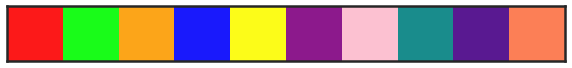

In [22]:
# different color for 2D-CARs
color_pca_dic = {}

color_dic_deeded = [(0.99, 0.1, 0.1, 1.0), (0.1, 0.99, 0.1, 1.0), (0.99, 0.65, 0.1, 1.0), 
                    (0.1, 0.1, 0.99, 1.0), (0.99, 0.99, 0.1, 1.0), (0.55, 0.1, 0.55, 1.0), 
                    (0.99, 0.76, 0.82, 1.0), (0.1, 0.55, 0.55, 1.0), (0.35, 0.1, 0.57, 1.0), (0.99, 0.5, 0.34, 1.0)]

sns.palplot(color_dic_deeded)
c_i = 0
for k,v in paint.get_color_dict(mp_car).items():
    color_pca_dic[k] = color_dic_deeded[c_i]
    c_i+=1

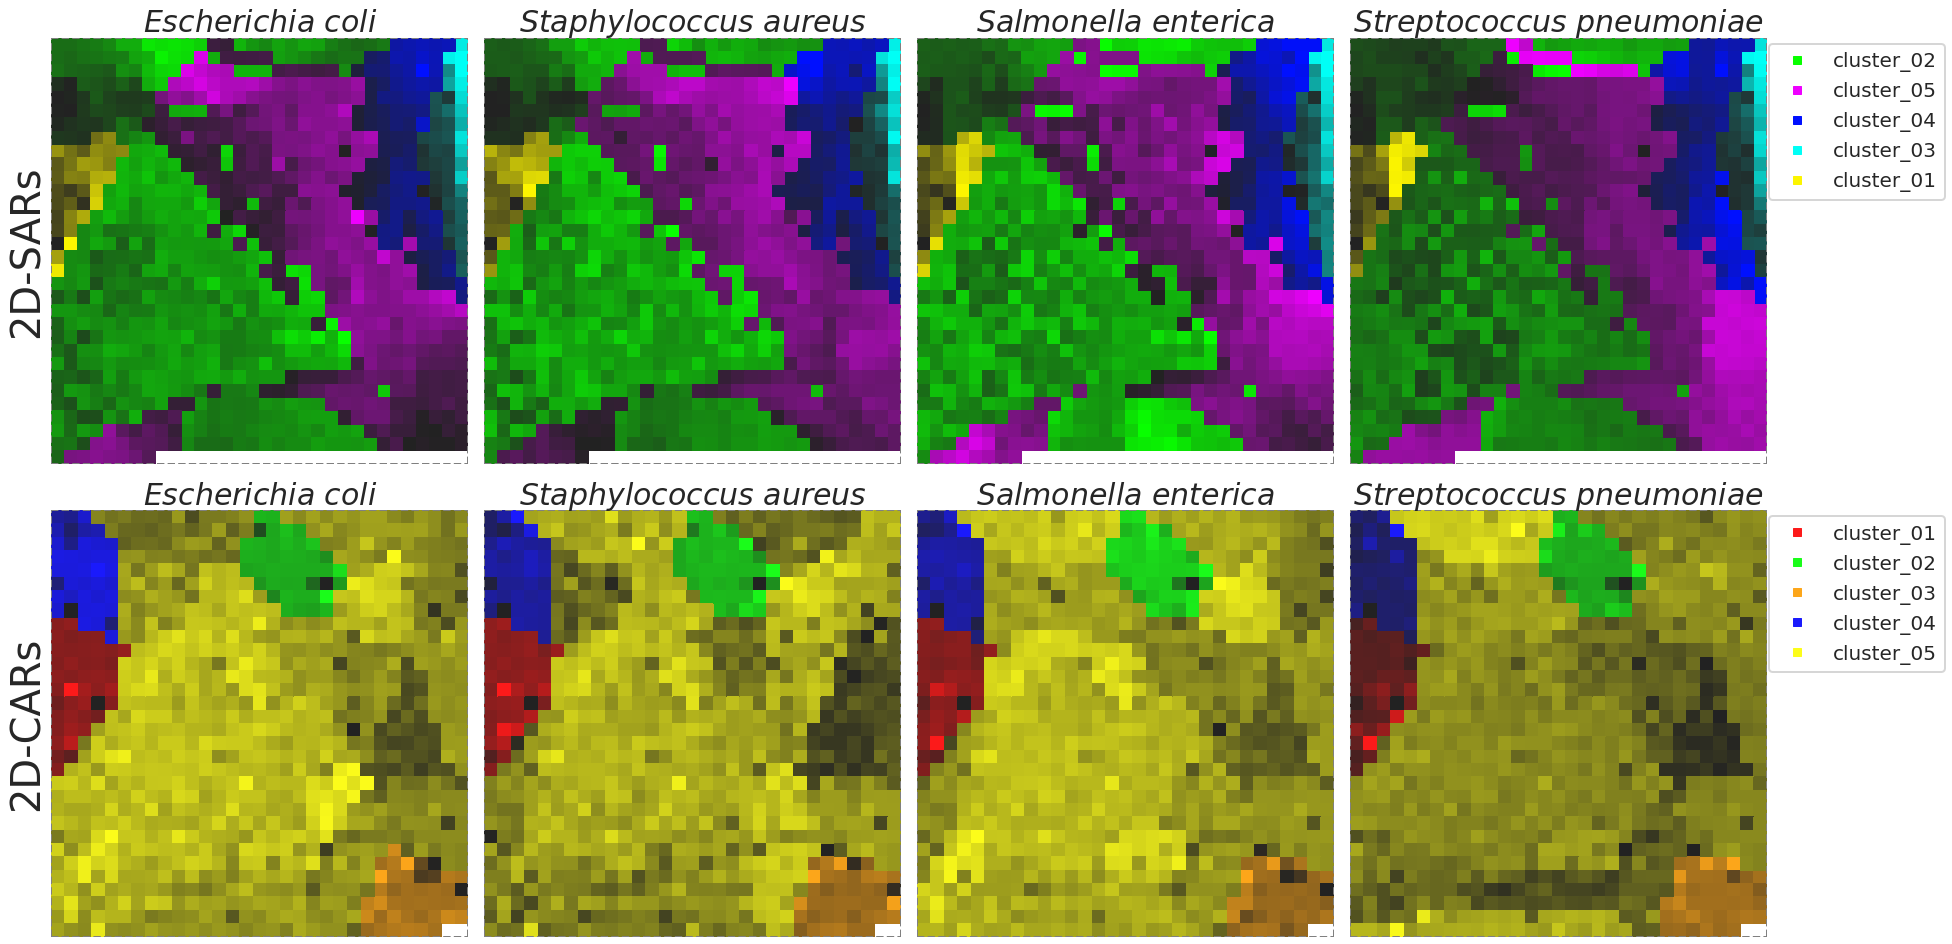

In [24]:
# 2D representations
fig, axes  = plt.subplots(2, 4, figsize=(27, 13),constrained_layout=True)

for ax_row,mp,xs,name_t in zip(axes,[mp_sar,mp_car],[x_sars,x_cars],['2D-SARs','2D-CARs']):
    count = 0
    for x,ax,name in zip(xs,ax_row,['${Escherichia}$ ${coli}$','${Staphylococcus}$ ${aureus}$','${Salmonella}$ ${enterica}$',
           '${Streptococcus}$ ${pneumoniae}$']):
        
        if name_t == '2D-SARs':
            if name == '${Streptococcus}$ ${pneumoniae}$':
                paint.show_fmap(mp, x, ax,get_line = False,theme = 'dark',show_legend = True)
            else:
                paint.show_fmap(mp, x, ax,get_line = False,theme = 'dark')
            ax.set_title(name,fontsize = 30)
            if count == 0:
                ax.set_ylabel(name_t,fontsize = 40)
                count+=1
            


        else:
            if name == '${Streptococcus}$ ${pneumoniae}$':
                paint.show_fmap(mp, x, ax,get_line = False,theme = 'dark',color_custom_dic = color_pca_dic,show_legend = True)
            else:
                paint.show_fmap(mp, x, ax,get_line = False,theme = 'dark',color_custom_dic = color_pca_dic)
                
            ax.set_title(name,fontsize = 30)
            if count ==0:
                ax.set_ylabel(name_t,fontsize = 40)
                count+=1
            